# GNN course assignment 1

### This assignment guides you through basic components and properties of graphs. Have fun!

In [2]:
# Load the required libraries
import torch
from torch_geometric.datasets import KarateClub
from torch_geometric.data import Data
import torch_geometric.transforms as T
import torch_geometric.utils as utils
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
# Load the Karate Club dataset
dataset = KarateClub()
data = dataset[0]

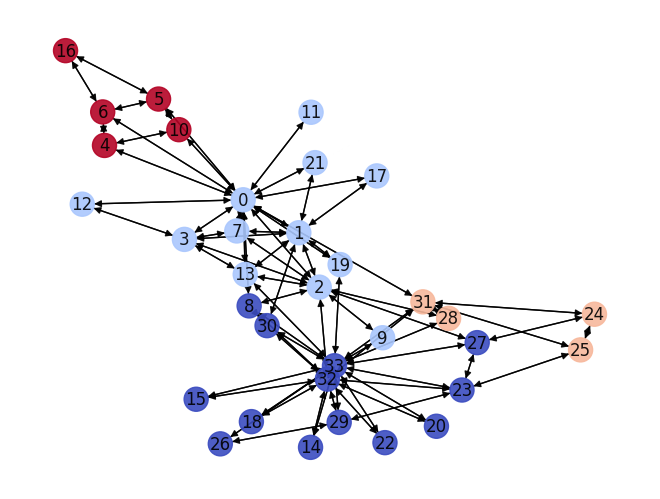

In [4]:
def vis_graph(data: Data) -> None:
    """
    Visualize the graph
    """
    G = utils.to_networkx(data)
    pos = nx.spring_layout(G)
    plt.figure()
    nx.draw(G, pos, node_color=data.y, cmap='coolwarm', edge_color='black', linewidths=1, node_size=300, alpha=0.9, labels={node: node for node in G.nodes()})
    plt.show()

# Visualize the graph
vis_graph(data)

---
### **Problem 1:** Create a graph with 5 nodes according to the given adjacency matrix.

/home/llt/anaconda3/envs/pyg/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


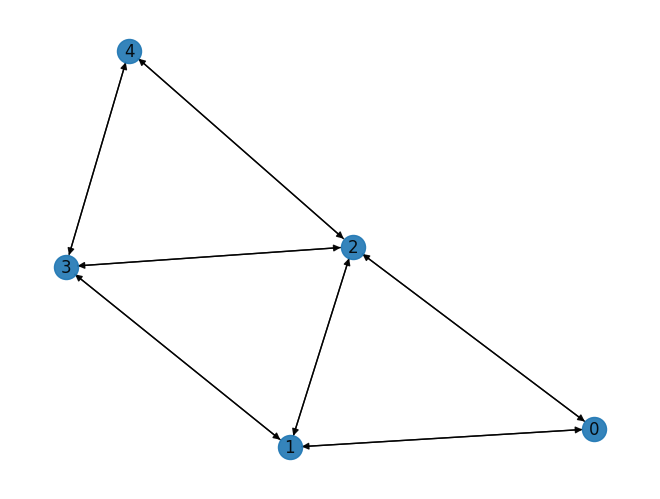

In [5]:
def create_graph() -> Data:
    """
    Create a graph with 5 nodes and 5 edges
    """
    adj = torch.tensor([[0, 1, 1, 0, 0],
                        [1, 0, 1, 1, 0],
                        [1, 1, 0, 1, 1],
                        [0, 1, 1, 0, 1],
                        [0, 0, 1, 1, 0]])
    # TODO: Create the graph
    x = torch.tensor([[1], [2], [3], [4], [5]], dtype=torch.float)
    data = Data(x=x, edge_index=adj.nonzero().t())

    return data

vis_graph(create_graph())

---
### **Problem 2:** Print out the basic information of the KarateClub graph.

In [10]:
def print_basic_info(data: Data) -> None:
    """
    Print the basic information of the graph
    """
    # TODO: Print the basic information of the graph
    num_nodes = data.num_nodes
    num_edges = data.num_edges
    num_node_features = data.num_node_features
    num_edge_features = data.num_edge_features
    num_classes = len(data.y.unique())
    connected = nx.is_connected(utils.to_networkx(data,to_undirected=True))
    
    print(f'Number of nodes: {num_nodes}')
    print(f'Number of edges: {num_edges}')
    print(f'Number of node features: {num_node_features}')
    print(f'Number of edge features: {num_edge_features}')
    print(f'Number of classes: {num_classes}')
    print(f'Connected: {connected}')

# Print the basic information of the graph
print_basic_info(data)

Number of nodes: 34
Number of edges: 156
Number of node features: 34
Number of edge features: 0
Number of classes: 4
Connected: True


---
### **Problem 3:** Plot the degree distribution of the KarateClub graph.

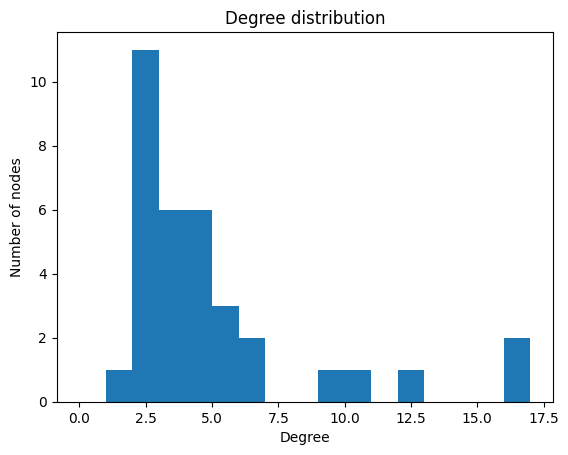

In [18]:
def degree_distribution(data: Data) -> None:
    """
    Plot the degree distribution of the graph
    """
     # TODO: Get the degree distribution of the graph
    degrees_tensor = utils.degree(data.edge_index[1], num_nodes=data.num_nodes, dtype=torch.long)
    degrees = degrees_tensor.cpu().numpy()
    plt.hist(degrees, bins=range(max(degrees)+1))
    plt.xlabel('Degree')
    plt.ylabel('Number of nodes')
    plt.title('Degree distribution')
    plt.show()

# Plot the degree distribution of the graph
degree_distribution(data)

---
### **Problem 4:** The clustering coefficient measures how connected a node’s neighbors are. Plot the distribution of the clustering coefficients and calculate the average.

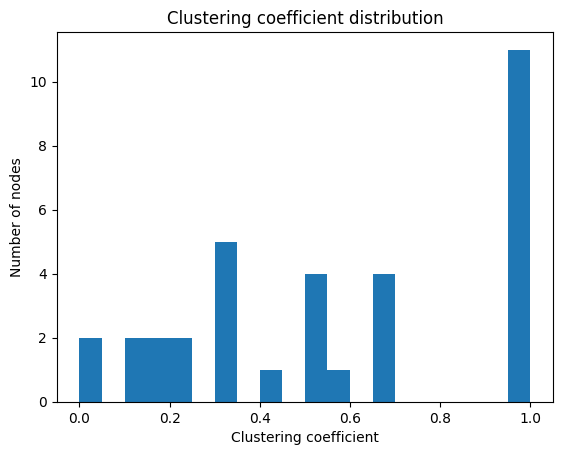

Average clustering coefficient: 0.5706384782076823


In [19]:
def clustering_coefficient(data: Data) -> None:
    """
    Plot the histogram of the clustering coefficients and calculate the average.
    """
    # TODO: Plot the histogram of the clustering coefficients; print the average
    clustering_coefficients = nx.clustering(utils.to_networkx(data,to_undirected=True)).values()
    avg_clustering_coefficient = sum(clustering_coefficients) / len(clustering_coefficients)

    plt.hist(clustering_coefficients, bins=20)
    plt.xlabel('Clustering coefficient')
    plt.ylabel('Number of nodes')
    plt.title('Clustering coefficient distribution')
    plt.show()
    print(f'Average clustering coefficient: {avg_clustering_coefficient}')

# Compute and print the clustering coefficient of the graph
clustering_coefficient(data)

---
### **Problem 5:** The shortest path length is the minimum number of edges in a path between two nodes. Plot the distribution of the shortest path lengths and calculate the average.

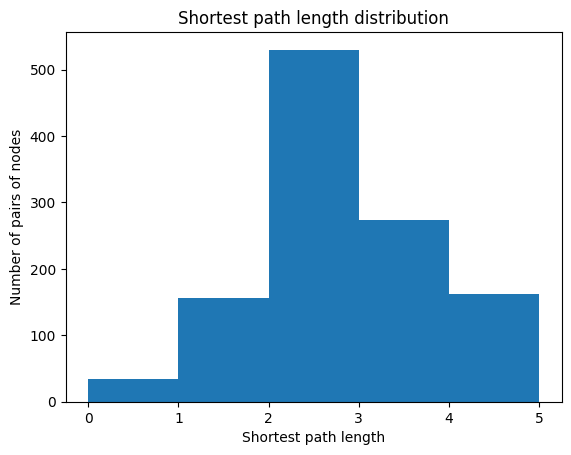

Average shortest path length: 2.337370242214533


In [23]:
def shortest_path(data: Data) -> None:
    """
    Plot the histogram of the shortest path lengths and calculate the average.
    """
    # TODO: Plot the distribution of the shortest path lengths; print the average
    shortest_paths = nx.all_pairs_shortest_path_length(utils.to_networkx(data,to_undirected=True))
    shortest_paths = [length for _, lengths in shortest_paths for length in lengths.values()]
    avg_shortest_path = sum(shortest_paths) / len(shortest_paths)

    plt.hist(shortest_paths, bins=range(max(shortest_paths)+1))
    plt.xlabel('Shortest path length')
    plt.ylabel('Number of pairs of nodes')
    plt.title('Shortest path length distribution')
    plt.show()
    print(f'Average shortest path length: {avg_shortest_path}')


# Compute and print the shortest path length of the graph
shortest_path(data)

---
### Problem 6: The diameter of a graph is the maximum shortest path length between any pair of nodes. Calculate and print out the diameter of the KarateClub graph.

In [24]:
def diameter(data: Data) -> None:
    """
    Compute the diameter of the graph
    """
    # TODO: Compute the diameter of the graph
    diameter = nx.diameter(utils.to_networkx(data,to_undirected=True))
    print(f'Diameter: {diameter}')

# Compute and print the diameter of the graph
diameter(data)

Diameter: 5


---
### Problem 7: The betweenness centrality measures the number of shortest paths that pass through a node. Plot the distribution of the betweenness centrality and calculate the average.

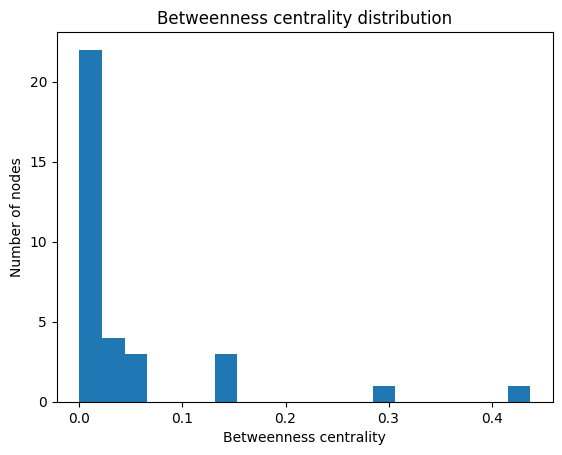

Average betweenness centrality: 0.044006238859180036


In [25]:
def betweenness_centrality(data: Data) -> None:
    """
    Plot the histogram of the betweenness centralities and calculate the average.
    """
    # TODO: Plot the histogram of the betweenness centralities; print the average
    betweenness_centralities = nx.betweenness_centrality(utils.to_networkx(data,to_undirected=True)).values()
    avg_betweenness_centrality = sum(betweenness_centralities) / len(betweenness_centralities)

    plt.hist(betweenness_centralities, bins=20)
    plt.xlabel('Betweenness centrality')
    plt.ylabel('Number of nodes')
    plt.title('Betweenness centrality distribution')
    plt.show()
    print(f'Average betweenness centrality: {avg_betweenness_centrality}')

# Compute and print the betweenness centrality of the graph
betweenness_centrality(data)

---
# Discussions

似乎数据集有点小，感觉课上讲的那些分布不是很明显？  
Degree Distribution似乎确实是幂律分布的，但其他并没有看到明显的分布趋势。  
传统方法还是用nx好